Считываем данные:

In [3]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

В данных отображена выручка компании и ее инвестиции в рекламу на TV, в газеты и на радио.

In [9]:
adver_data.head(7) #первые 7 позиций

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8


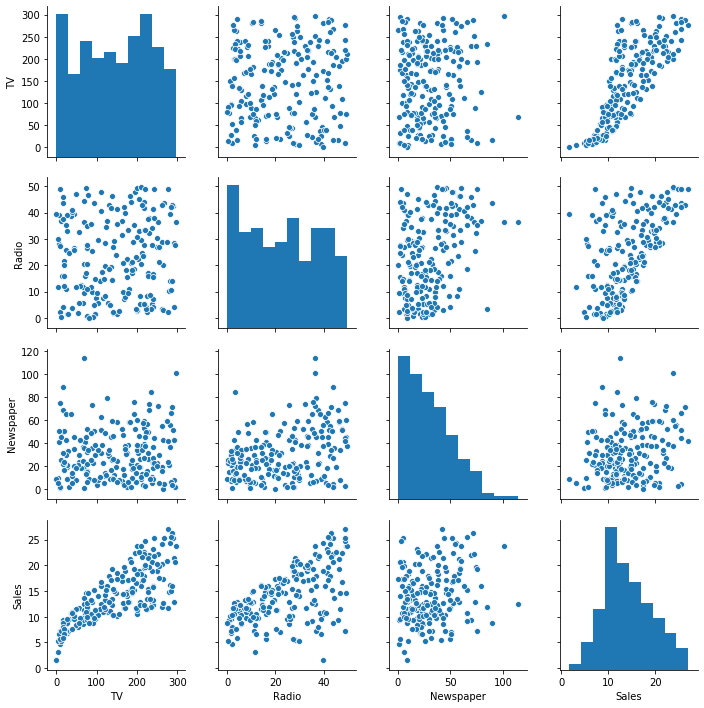

In [7]:
import seaborn as sns
sns.pairplot(adver_data)

По попарным зависимостям делаем вывод, что продажи $Sales$ больше всего зависят от вложений в $TV$. Имеет место быть прямой линейной зависимости. С $Radio$ похожая ситуация, но вложения будут не такими эффективными. Зависимости от $Newspaper$ явной нет.

Составим таблицу коэффициентов корреляции для наших признаков:

In [13]:
adver_data.corr('kendall')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.041202,0.034156,0.621946
Radio,0.041202,1.000000,0.207077,0.419447
Newspaper,0.034156,0.207077,1.000000,0.132271
Sales,0.621946,0.419447,0.132271,1.000000


Что и требовалось доказать, самая высокая корреляция между инвестициями в 'TV' и выручкой 'Sales'.

Средняя выручка = медиана:

In [32]:
adver_data['Sales'].median()

12.9

Посмотрим на те дни, когда выручка была плохой, а вложения в газету большие:

In [34]:
tmp = adver_data[(adver_data['Sales'] < 15) & (adver_data['Newspaper'] > 50)]
tmp

,TV,Radio,Newspaper,Sales
3,17.2,45.9,69.3,9.3
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
13,23.8,35.1,65.9,9.2
17,67.8,36.6,114.0,12.5
76,16.9,43.7,89.4,8.7
89,88.3,25.5,73.4,12.9
111,225.8,8.2,56.5,13.4
116,75.1,35.0,52.7,12.6
122,18.8,21.7,50.4,7.0


Как можно увидеть, выручка оказывалась очень низкой, когда не было вложения в 'TV'.